<div style="background-color:#f9fafb; padding:25px; border-radius:12px; border:1px solid #e5e7eb; font-family:Arial, Helvetica, sans-serif;">

  <h1 style="color:#1f2937; text-align:center; margin-bottom:10px;">
    🚗 BMW Sales Analysis <span style="color:#6b7280;">(2010–2024)</span>
  </h1>

  <p style="font-size:16px; color:#374151; line-height:1.6; text-align:justify;">
    The objective of this project is to analyze <strong>BMW sales data</strong> from 
    <strong>2010 to 2024</strong> in order to extract meaningful business insights. 
    This analysis focuses on understanding overall sales performance, identifying 
    which vehicle categories generate the highest sales, and determining the key 
    factors that influence sales trends.
  </p>

  <hr style="border:none; height:1px; background-color:#e5e7eb; margin:25px 0;">

  <h2 style="color:#111827;">📊 Sales Prediction Objective</h2>

  <p style="font-size:16px; color:#374151; line-height:1.6; text-align:justify;">
    A <strong>machine learning classification model</strong> is developed to predict 
    future sales performance. Sales are categorized into two classes:
  </p>

  <ul style="font-size:16px; color:#374151; line-height:1.8; padding-left:20px;">
    <li><strong>Low Sales:</strong> Sales less than <span style="color:#dc2626;">7,000 units</span></li>
    <li><strong>High Sales:</strong> Sales greater than or equal to <span style="color:#16a34a;">7,000 units</span></li>
  </ul>

  <hr style="border:none; height:1px; background-color:#e5e7eb; margin:25px 0;">

  <h2 style="color:#111827;">🎯 Key Outcomes</h2>

  <ul style="font-size:16px; color:#374151; line-height:1.9; padding-left:20px;">
    <li>Identify <strong>high-performing</strong> and <strong>low-performing</strong> BMW car models</li>
    <li>Understand the <strong>key factors driving sales</strong></li>
    <li>Enable <strong>data-driven decision-making</strong> for production, marketing, and inventory planning</li>
  </ul>

  <div style="margin-top:30px; padding:15px; background-color:#eef2ff; border-left:6px solid #4f46e5; border-radius:6px;">
    <p style="margin:0; font-size:15px; color:#1e3a8a;">
      💡 <strong>Impact:</strong> This project helps stakeholders forecast demand, optimize business strategy,
      and improve overall sales performance using data science.
    </p>
  </div>

</div>


### Import Libraries
In this section we will import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/bmw-sales2010-2024/BMW sales data (2010-2024).csv")

<div style="background-color:#f8fafc; padding:22px; border-radius:10px; border:1px solid #e5e7eb; font-family:Arial, Helvetica, sans-serif;">

  <h2 style="color:#1f2937; margin-bottom:10px;">
    🔍 Basic Exploratory Data Analysis (EDA)
  </h2>

  <p style="font-size:15.5px; color:#374151; line-height:1.7; text-align:justify;">
    In this section, we perform <strong>basic exploratory data analysis (EDA)</strong> 
    to understand the structure, quality, and key characteristics of the dataset. 
    This step helps identify patterns, trends, and potential issues before applying 
    any machine learning models.
  </p>

  <ul style="font-size:15.5px; color:#374151; line-height:1.9; padding-left:20px;">
    <li>Understanding dataset shape and data types</li>
    <li>Checking missing and duplicate values</li>
    <li>Analyzing basic statistical summaries</li>
    <li>Exploring distributions and sales trends</li>
  </ul>

  <div style="margin-top:18px; padding:14px; background-color:#ecfeff; border-left:5px solid #06b6d4; border-radius:6px;">
    <p style="margin:0; font-size:14.5px; color:#0f172a;">
      📌 <strong>Note:</strong> Insights gained from this EDA phase guide feature selection 
      and model-building decisions in later stages.
    </p>
  </div>

</div>


In [4]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
# check null values
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [7]:
# Value count of target variable
df['Sales_Classification'].value_counts()

Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64

The target variable shows class imbalance, with the ‘High Sales’ category dominating the dataset. This imbalance may bias the model toward the majority class, so appropriate evaluation metrics and handling techniques are required.

In [8]:
# Summary Statistics
df.describe()

Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000

In [9]:
# creating labels and bins for 'Engine_Size_L' 
bins = [0, 2.0, 3.5, 5.0]                  # define the ranges
labels = ['Small', 'Medium', 'Large']      # define the labels

df['Engine_Label'] = pd.cut(df['Engine_Size_L'], bins=bins, labels=labels, include_lowest=True)

In [13]:
df['Engine_Label'].value_counts()

Engine_Label
Medium    21443
Large     20687
Small      7870
Name: count, dtype: int64

### Distribution Analysis

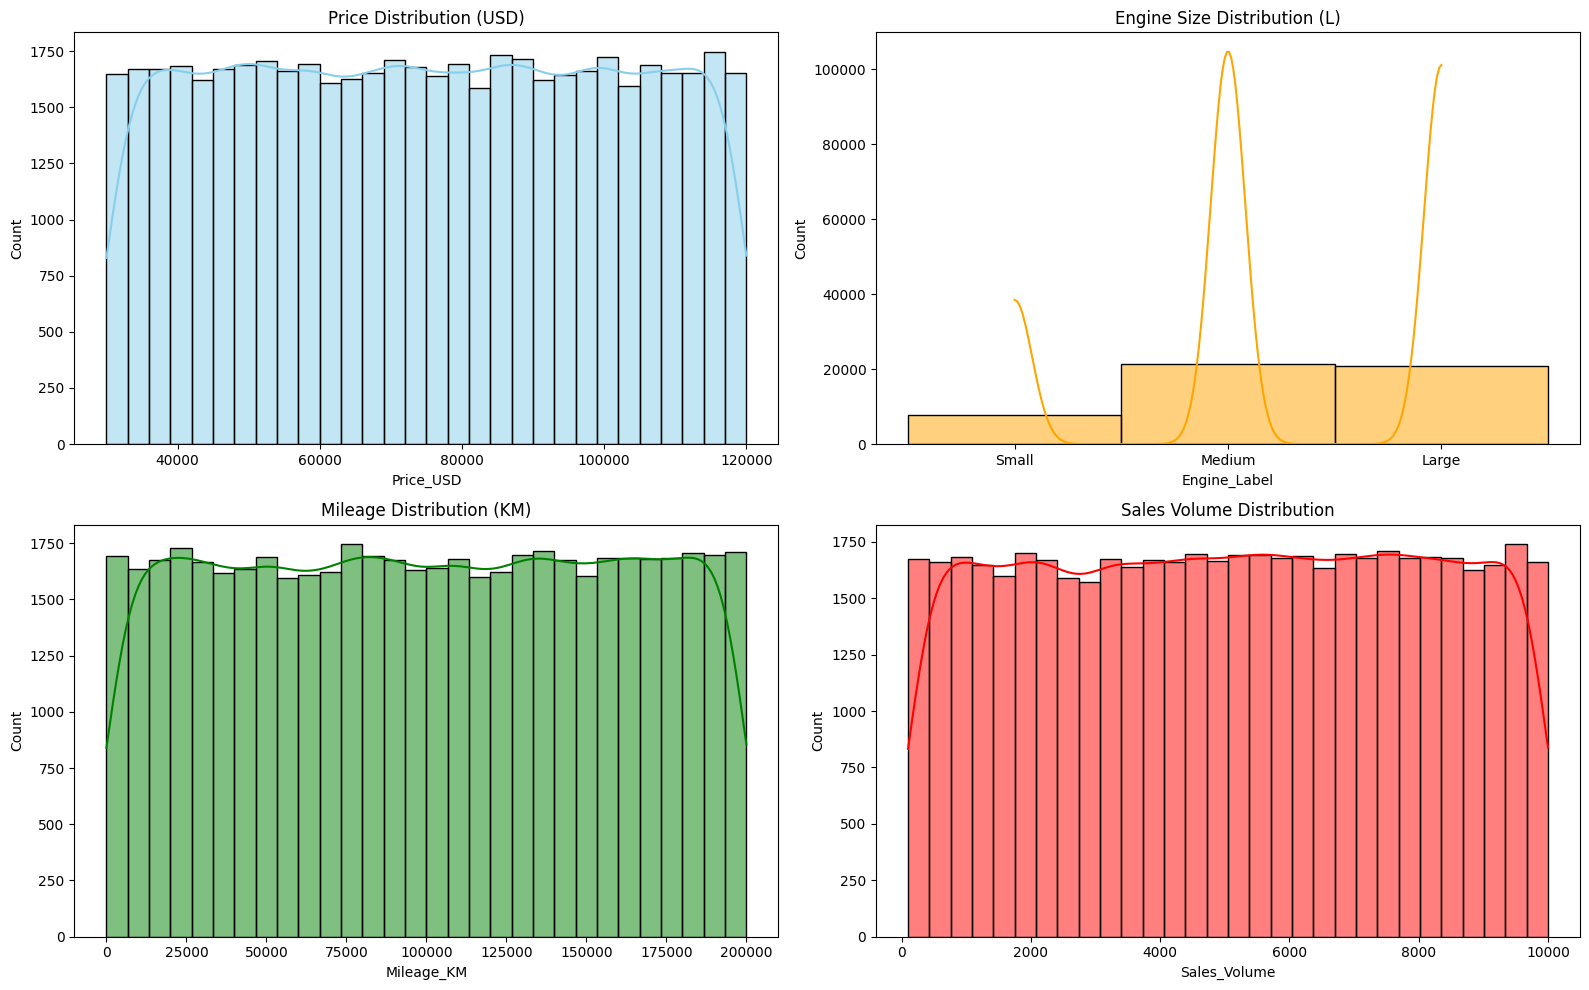

In [10]:
plt.figure(figsize=(16, 10))

# Price distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Price_USD'], kde=True, bins=30, color='skyblue')
plt.title('Price Distribution (USD)')

# Engine size distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Engine_Label'], kde=True, bins=20, color='orange')
plt.title('Engine Size Distribution (L)')

# Mileage distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Mileage_KM'], kde=True, bins=30, color='green')
plt.title('Mileage Distribution (KM)')

# Sales volume distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Sales_Volume'], kde=True, bins=30, color='red')
plt.title('Sales Volume Distribution')

plt.tight_layout()
plt.show()

### Count / Percentage Analysis


Count of cars by Model:
 Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64

Percentage of cars by Model:
 Model
7 Series    9.33
i3          9.24
i8          9.21
3 Series    9.19
5 Series    9.18
X1          9.14
X3          8.99
X5          8.97
M5          8.96
X6          8.96
M3          8.83
Name: proportion, dtype: float64


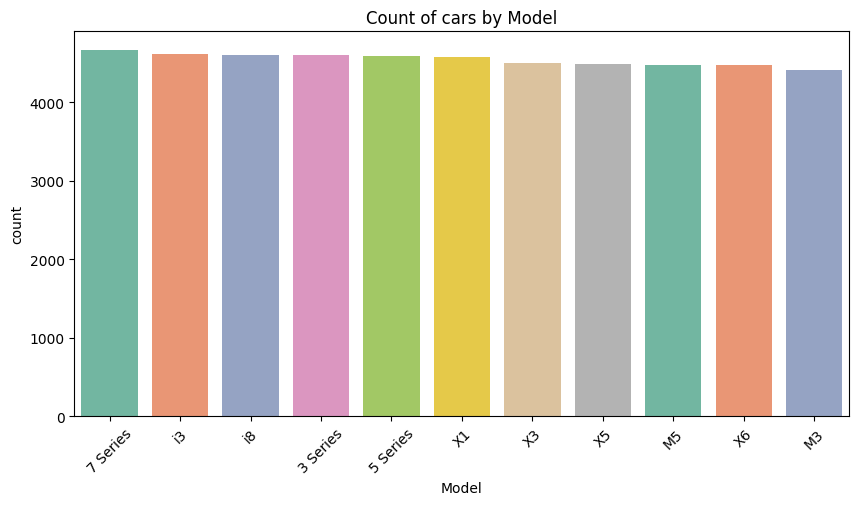


Count of cars by Fuel_Type:
 Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64

Percentage of cars by Fuel_Type:
 Fuel_Type
Hybrid      25.43
Petrol      25.10
Electric    24.94
Diesel      24.53
Name: proportion, dtype: float64


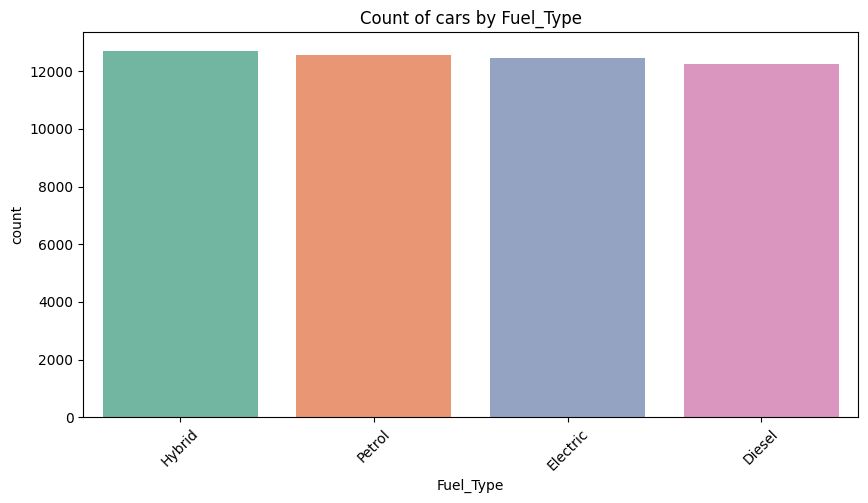


Count of cars by Transmission:
 Transmission
Manual       25154
Automatic    24846
Name: count, dtype: int64

Percentage of cars by Transmission:
 Transmission
Manual       50.31
Automatic    49.69
Name: proportion, dtype: float64


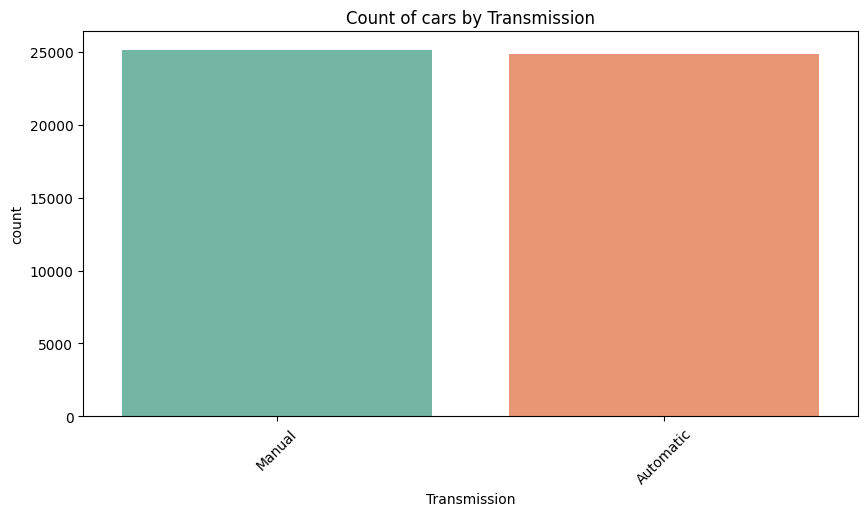


Count of cars by Region:
 Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

Percentage of cars by Region:
 Region
Asia             16.91
Middle East      16.75
North America    16.67
Europe           16.67
Africa           16.51
South America    16.50
Name: proportion, dtype: float64


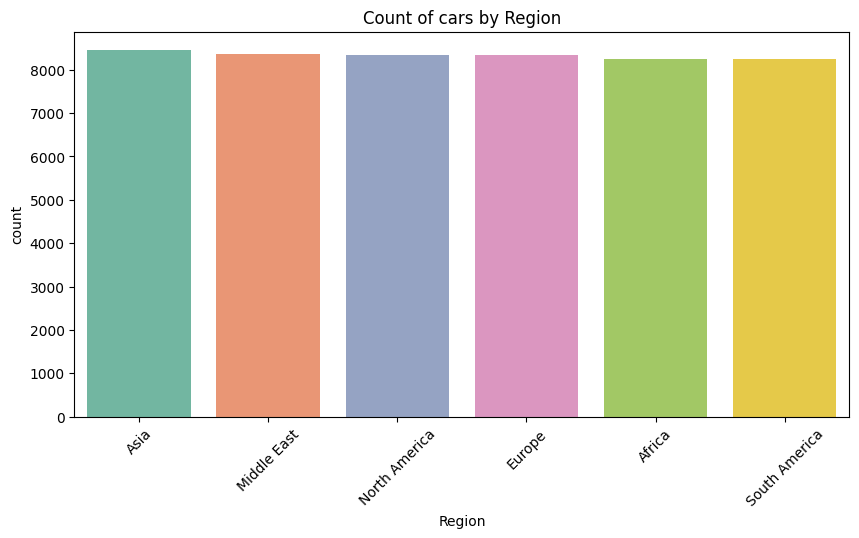


Count of cars by Color:
 Color
Red       8463
Silver    8350
Grey      8348
White     8304
Black     8273
Blue      8262
Name: count, dtype: int64

Percentage of cars by Color:
 Color
Red       16.93
Silver    16.70
Grey      16.70
White     16.61
Black     16.55
Blue      16.52
Name: proportion, dtype: float64


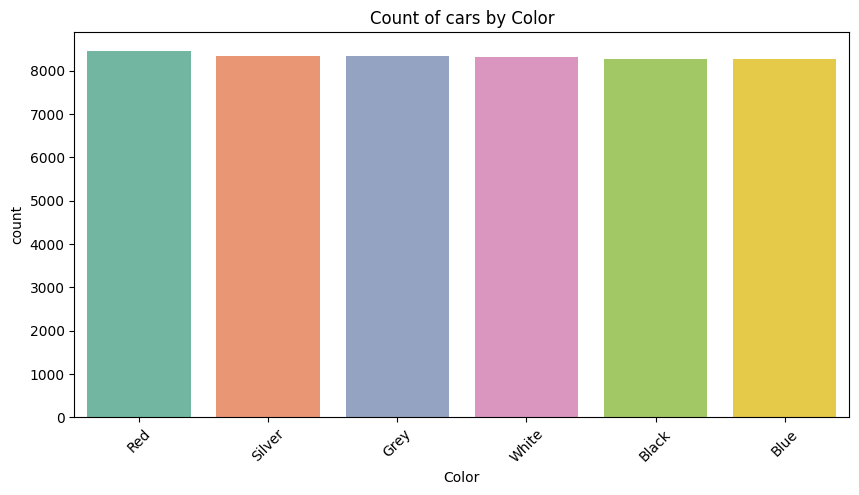


Count of cars by Sales_Classification:
 Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64

Percentage of cars by Sales_Classification:
 Sales_Classification
Low     69.51
High    30.49
Name: proportion, dtype: float64


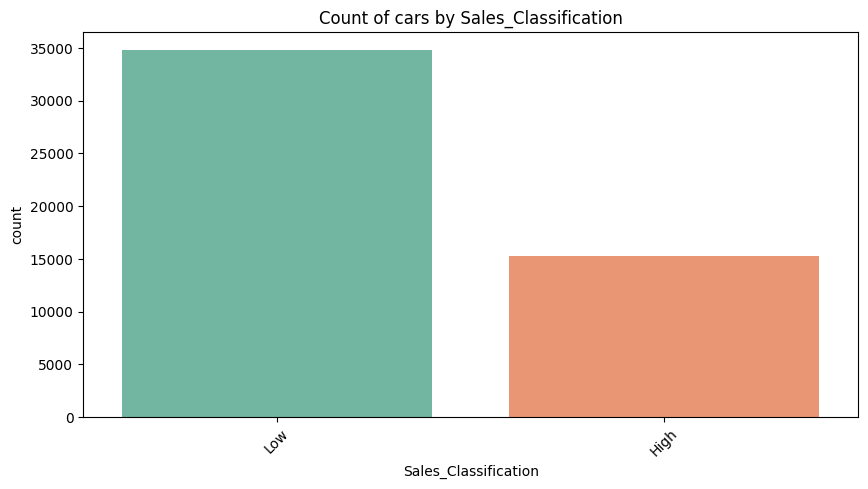

In [13]:
categorical_cols = ['Model', 'Fuel_Type', 'Transmission', 'Region', 'Color', 'Sales_Classification']

for col in categorical_cols:
    print(f"\nCount of cars by {col}:\n", df[col].value_counts())
    print(f"\nPercentage of cars by {col}:\n", round(df[col].value_counts(normalize=True) * 100, 2))
    
    # Optional: plot count
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Count of cars by {col}')
    plt.xticks(rotation=45)
    plt.show()

### Histograms & Box Plots

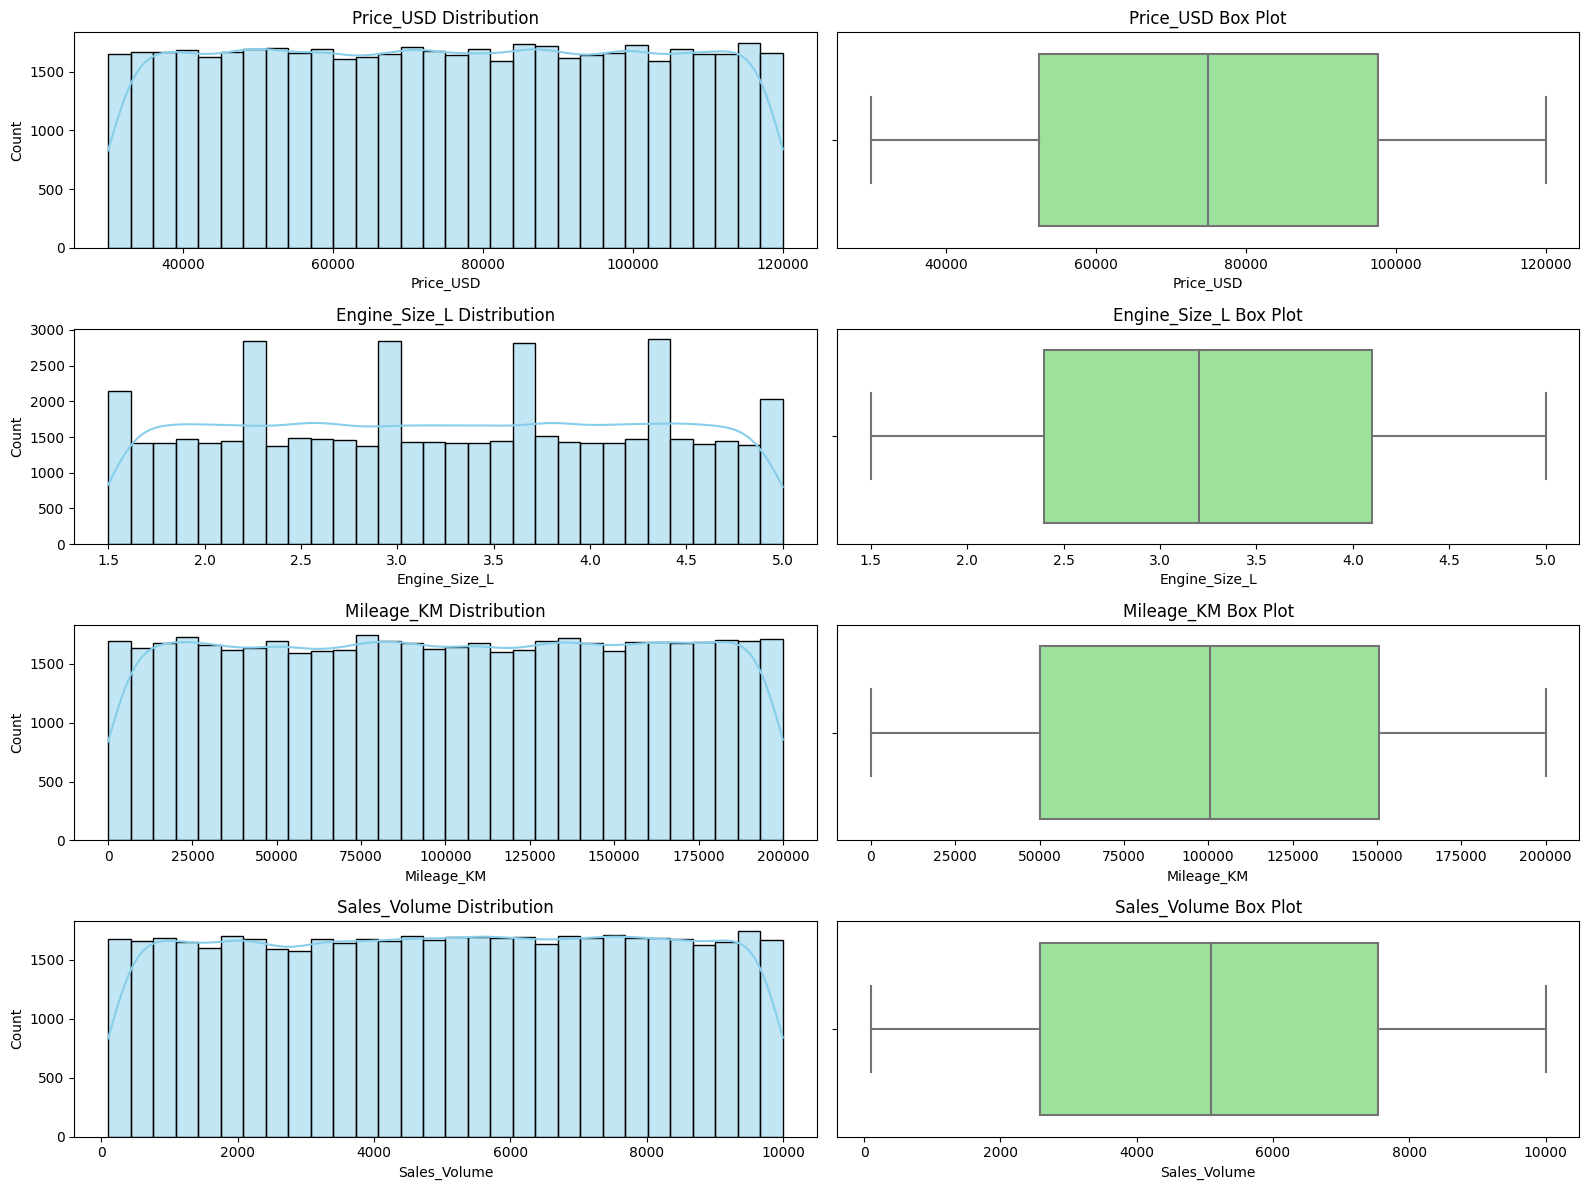

In [46]:
numeric_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Sales_Volume']

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols):
    # Histogram
    plt.subplot(4, 2, 2*i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    
    # Box plot
    plt.subplot(4, 2, 2*i+2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Box Plot')

plt.tight_layout()
plt.show()


###  Bar Charts

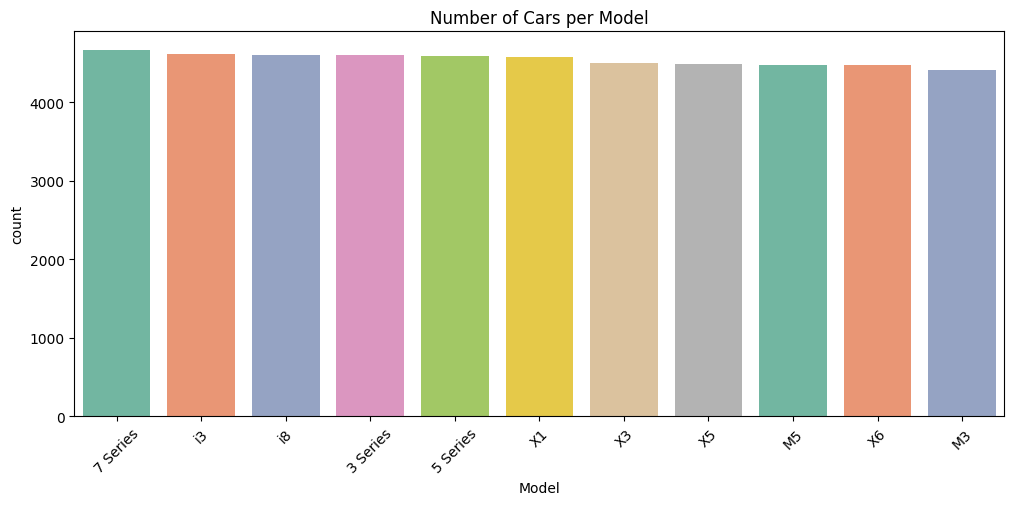

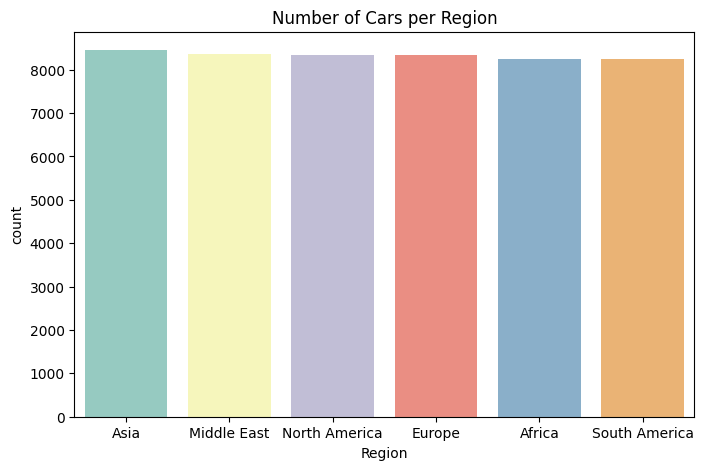

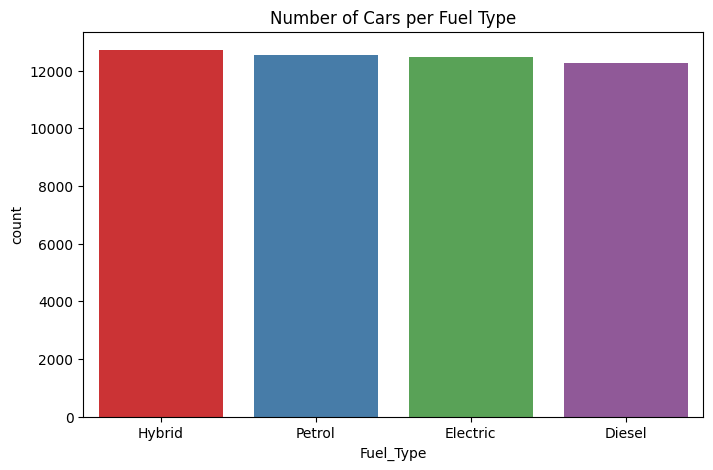

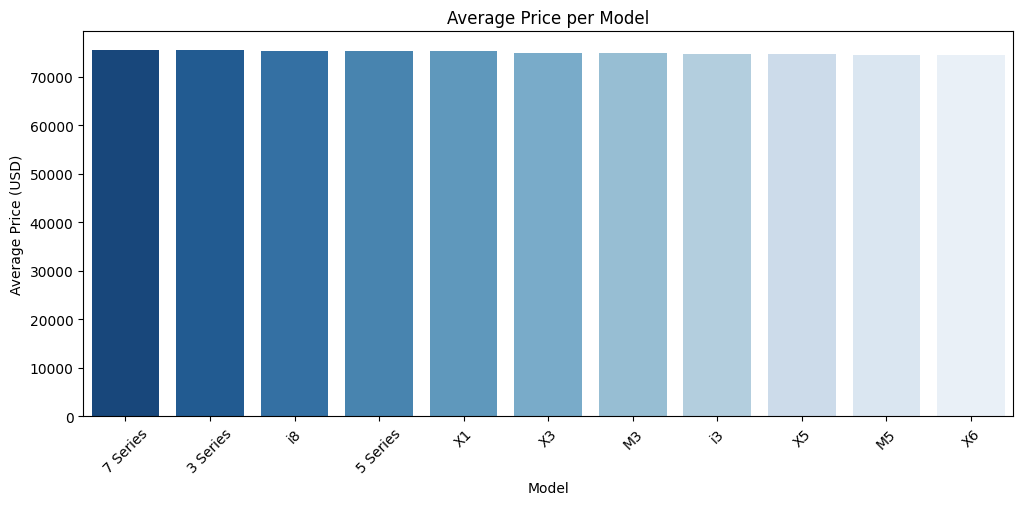

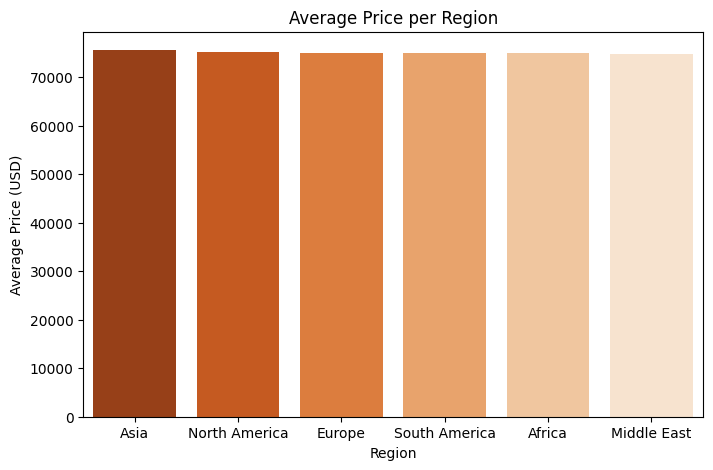

In [47]:
# Number of cars per model
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Model', order=df['Model'].value_counts().index, palette='Set2')
plt.title('Number of Cars per Model')
plt.xticks(rotation=45)
plt.show()

# Number of cars per region
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Region', order=df['Region'].value_counts().index, palette='Set3')
plt.title('Number of Cars per Region')
plt.show()

# Number of cars per fuel type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Fuel_Type', order=df['Fuel_Type'].value_counts().index, palette='Set1')
plt.title('Number of Cars per Fuel Type')
plt.show()

# Average price per model
avg_price_model = df.groupby('Model')['Price_USD'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=avg_price_model.index, y=avg_price_model.values, palette='Blues_r')
plt.title('Average Price per Model')
plt.xticks(rotation=45)
plt.ylabel('Average Price (USD)')
plt.show()

# Average price per region
avg_price_region = df.groupby('Region')['Price_USD'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_region.index, y=avg_price_region.values, palette='Oranges_r')
plt.title('Average Price per Region')
plt.ylabel('Average Price (USD)')
plt.show()

### Scatter Plots

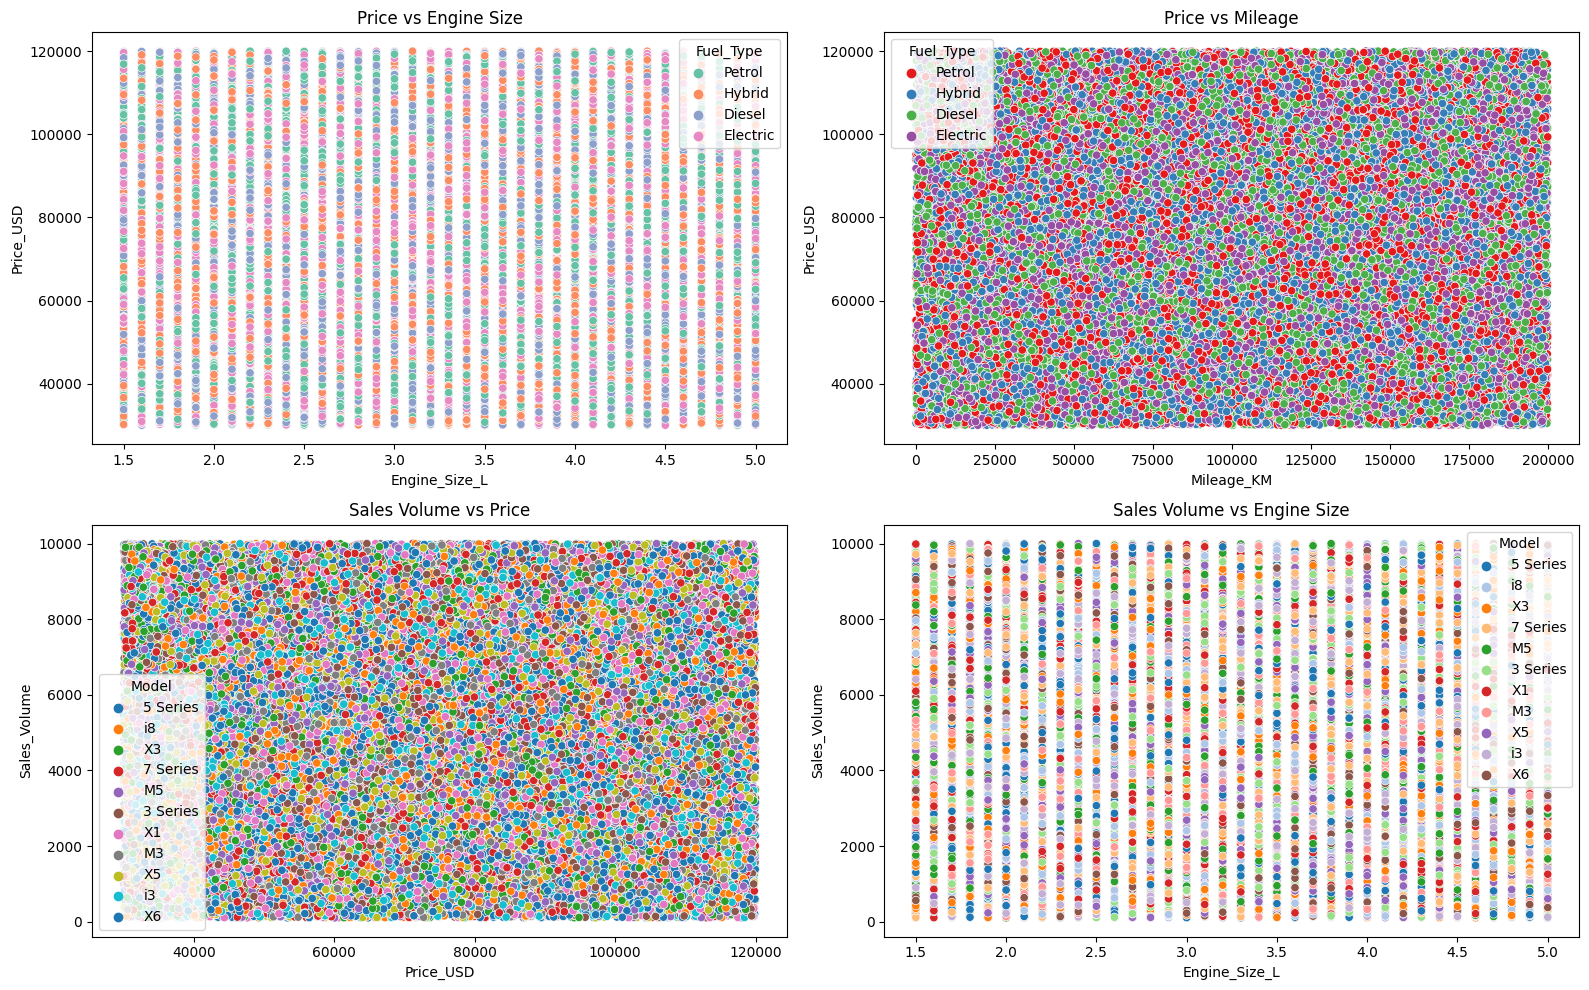

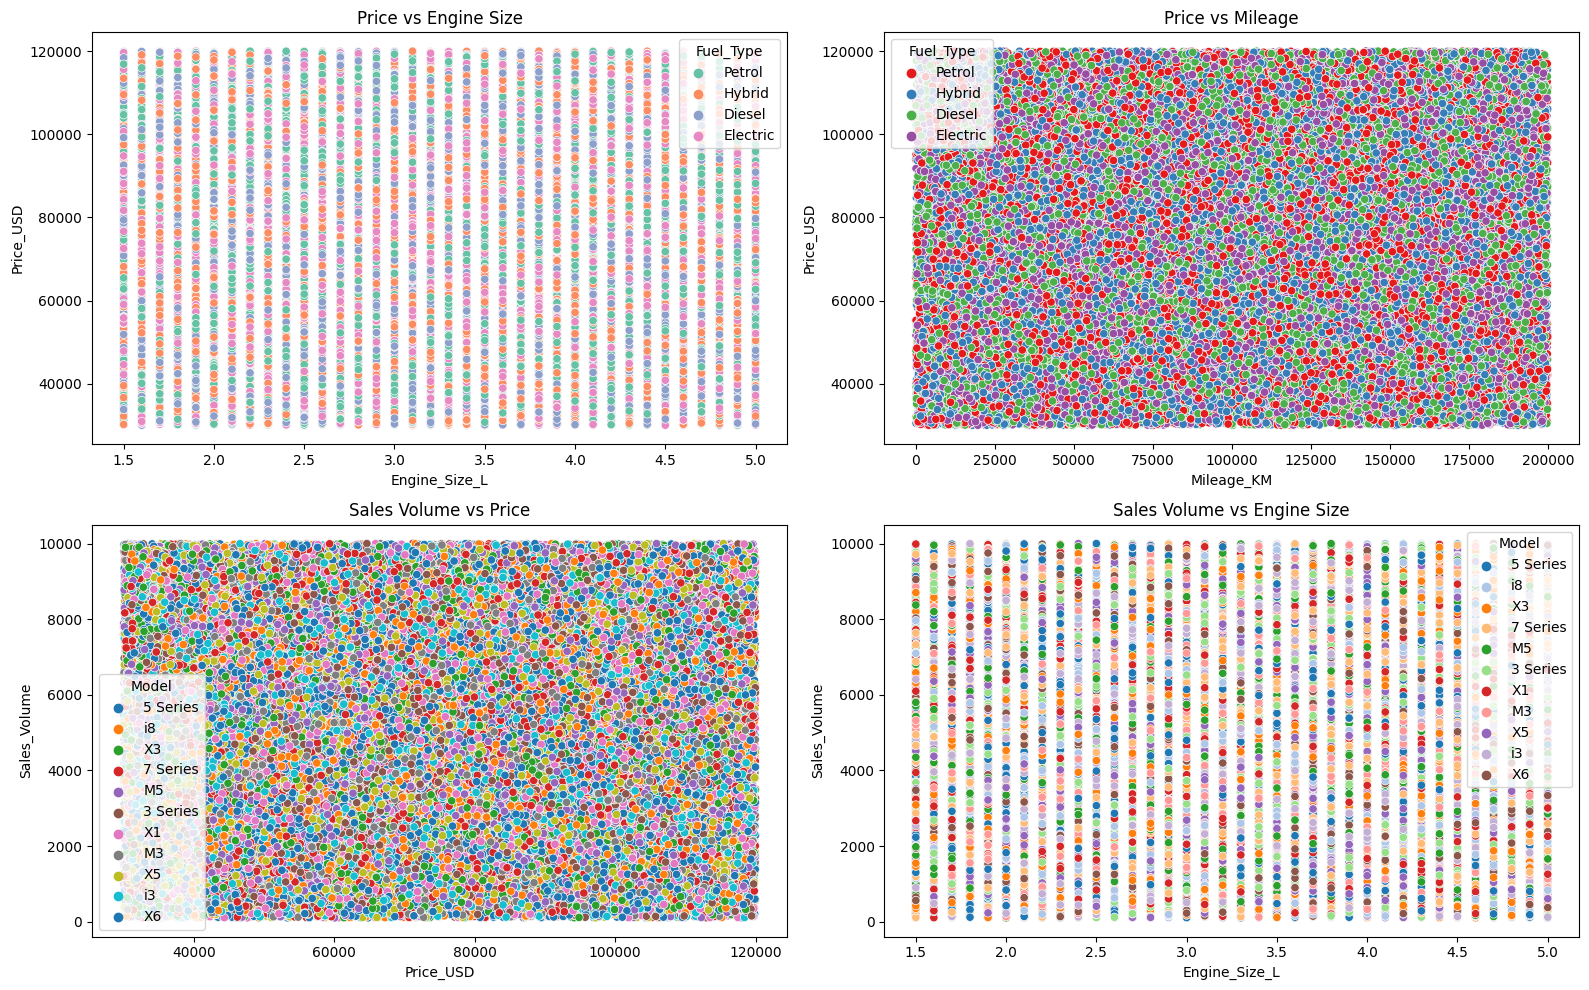

In [15]:
plt.figure(figsize=(16,10))

# Price vs Engine Size
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Engine_Size_L', y='Price_USD', hue='Fuel_Type', palette='Set2')
plt.title('Price vs Engine Size')

# Price vs Mileage
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Mileage_KM', y='Price_USD', hue='Fuel_Type', palette='Set1')
plt.title('Price vs Mileage')

# Sales Volume vs Price
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Price_USD', y='Sales_Volume', hue='Model', palette='tab10')
plt.title('Sales Volume vs Price')

# Sales Volume vs Engine Size
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='Engine_Size_L', y='Sales_Volume', hue='Model', palette='tab20')
plt.title('Sales Volume vs Engine Size')

plt.tight_layout()
plt.show()# 3️⃣ Scatter Plots
# ============================

plt.figure(figsize=(16,10))

# Price vs Engine Size
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Engine_Size_L', y='Price_USD', hue='Fuel_Type', palette='Set2')
plt.title('Price vs Engine Size')

# Price vs Mileage
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='Mileage_KM', y='Price_USD', hue='Fuel_Type', palette='Set1')
plt.title('Price vs Mileage')

# Sales Volume vs Price
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='Price_USD', y='Sales_Volume', hue='Model', palette='tab10')
plt.title('Sales Volume vs Price')

# Sales Volume vs Engine Size
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='Engine_Size_L', y='Sales_Volume', hue='Model', palette='tab20')
plt.title('Sales Volume vs Engine Size')

plt.tight_layout()
plt.show()

## 1. Report:
Cars haiving Low volume sales are  34754 Cars haiving High volume sales are  15246\
cars with smal engine sold less and with medium and large sold more


### Compare Price Across Categories

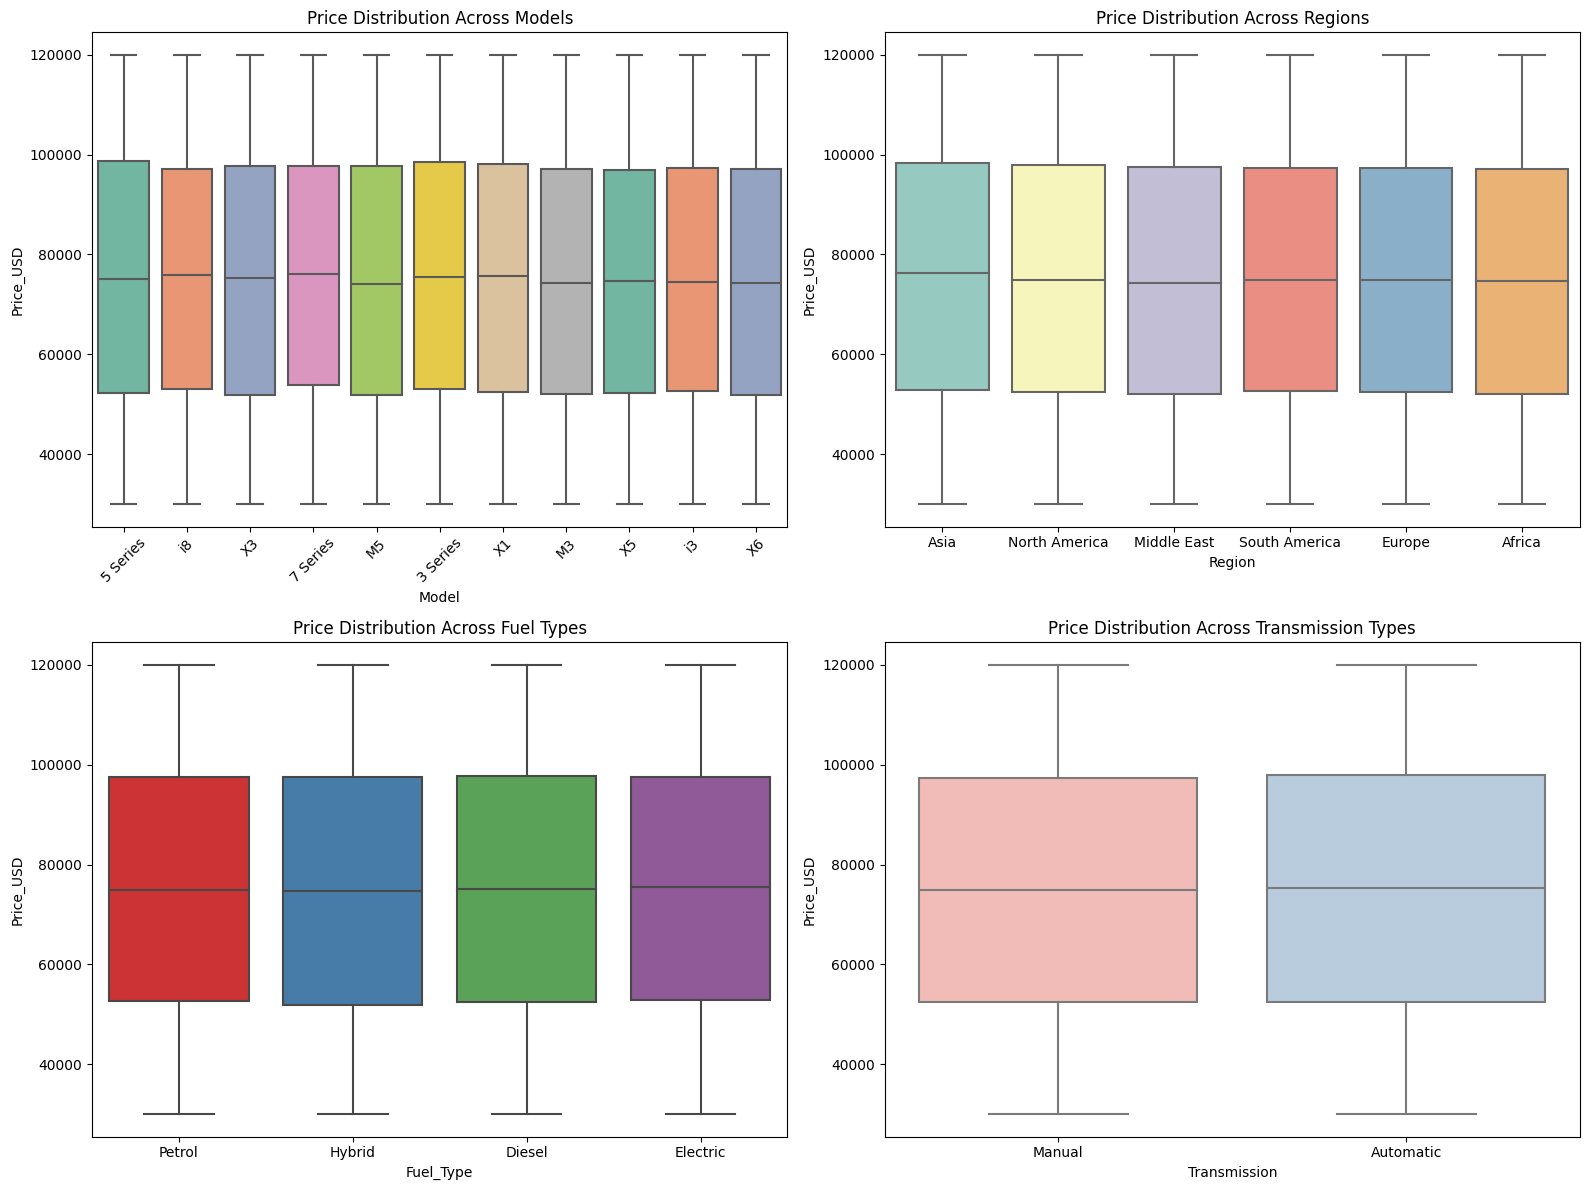

In [50]:
plt.figure(figsize=(16,12))

# Price vs Model
plt.subplot(2,2,1)
sns.boxplot(data=df, x='Model', y='Price_USD', palette='Set2')
plt.title('Price Distribution Across Models')
plt.xticks(rotation=45)

# Price vs Region
plt.subplot(2,2,2)
sns.boxplot(data=df, x='Region', y='Price_USD', palette='Set3')
plt.title('Price Distribution Across Regions')

# Price vs Fuel Type
plt.subplot(2,2,3)
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD', palette='Set1')
plt.title('Price Distribution Across Fuel Types')

# Price vs Transmission
plt.subplot(2,2,4)
sns.boxplot(data=df, x='Transmission', y='Price_USD', palette='Pastel1')
plt.title('Price Distribution Across Transmission Types')

plt.tight_layout()
plt.show()



### Trend Analysis

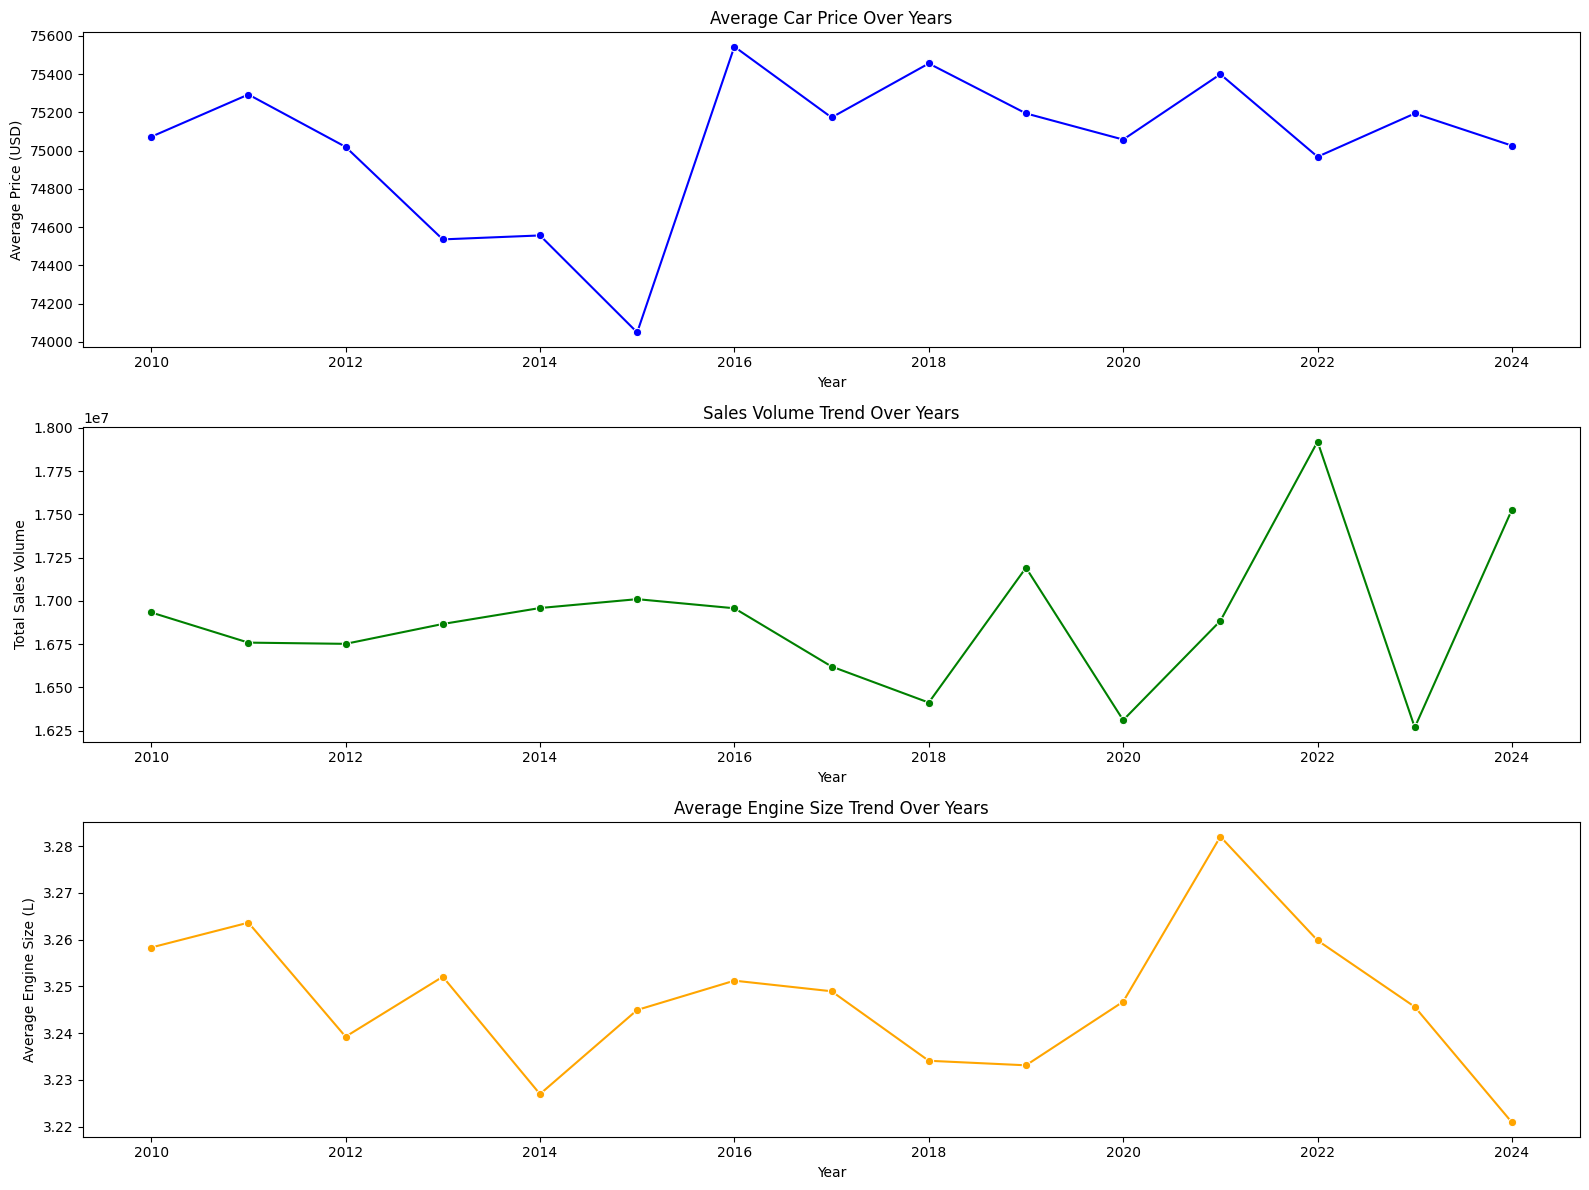

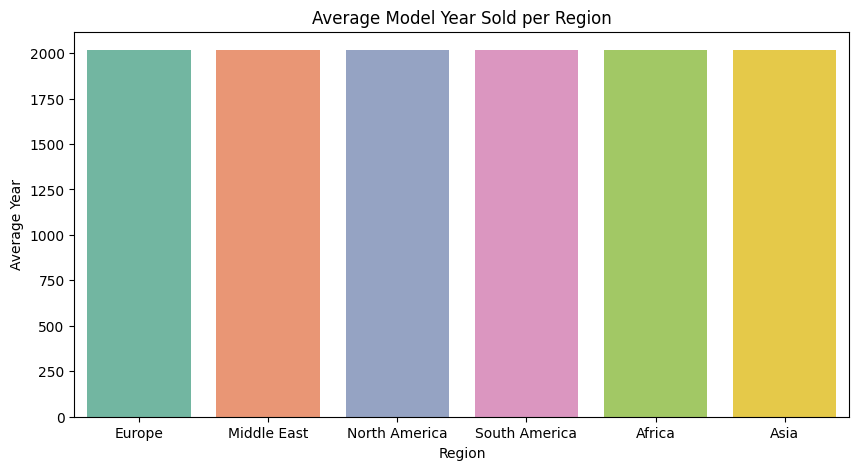

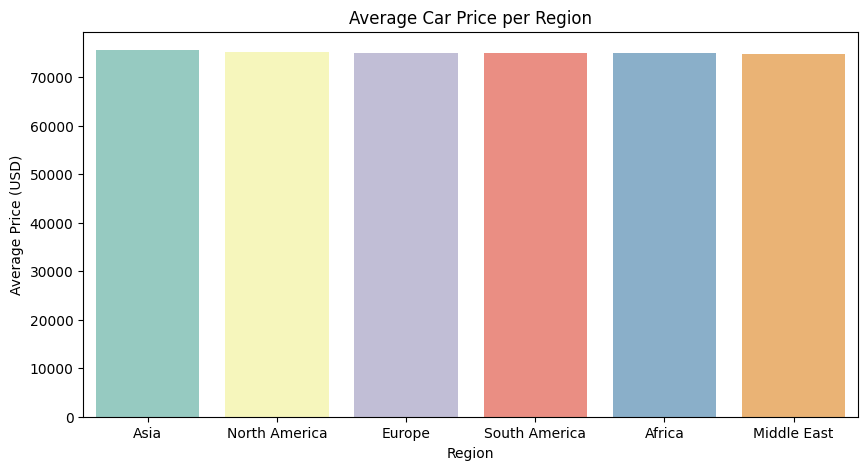

In [56]:
# Average price per year
avg_price_year = df.groupby('Year')['Price_USD'].mean()

# Sales volume per year
sales_volume_year = df.groupby('Year')['Sales_Volume'].sum()

# Average engine size per year
avg_engine_year = df.groupby('Year')['Engine_Size_L'].mean()

plt.figure(figsize=(16,12))

# Average price trend
plt.subplot(3,1,1)
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values, marker='o', color='blue')
plt.title('Average Car Price Over Years')
plt.ylabel('Average Price (USD)')
plt.xlabel('Year')

# Sales volume trend
plt.subplot(3,1,2)
sns.lineplot(x=sales_volume_year.index, y=sales_volume_year.values, marker='o', color='green')
plt.title('Sales Volume Trend Over Years')
plt.ylabel('Total Sales Volume')
plt.xlabel('Year')

# Engine size trend
plt.subplot(3,1,3)
sns.lineplot(x=avg_engine_year.index, y=avg_engine_year.values, marker='o', color='orange')
plt.title('Average Engine Size Trend Over Years')
plt.ylabel('Average Engine Size (L)')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

# ============================
# 2️⃣ Region-wise Trends
# ============================

# Average year of cars sold per region (newer vs older models)
avg_year_region = df.groupby('Region')['Year'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_year_region.index, y=avg_year_region.values, palette='Set2')
plt.title('Average Model Year Sold per Region')
plt.ylabel('Average Year')
plt.xlabel('Region')
plt.show()

# Price sensitivity: Average price per region
avg_price_region = df.groupby('Region')['Price_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_region.index, y=avg_price_region.values, palette='Set3')
plt.title('Average Car Price per Region')
plt.ylabel('Average Price (USD)')
plt.xlabel('Region')
plt.show()


### 5️⃣ Classification/Prediction Analysis

In [17]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

# Load dataset
# df = pd.read_csv('your_file.csv')

# ============================
# 1️⃣ Preprocessing
# ============================

# Select features
features = ['Model', 'Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Region', 'Fuel_Type']
target = 'Sales_Classification'

X = df[features]
y = df[target]

# Encode categorical features
cat_cols = ['Model', 'Region', 'Fuel_Type']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le  # Save encoders if needed later

# Encode target if necessary
y = LabelEncoder().fit_transform(y)  # High=1, Low=0

# Scale numeric features
num_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("F1-score:", f1_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Logistic Regression Results:
Accuracy: 0.6951
F1-score: 0.820128605981948
Confusion Matrix:
 [[   0 3049]
 [   0 6951]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3049
           1       0.70      1.00      0.82      6951

    accuracy                           0.70     10000
   macro avg       0.35      0.50      0.41     10000
weighted avg       0.48      0.70      0.57     10000

Decision Tree Results:
Accuracy: 0.5661
F1-score: 0.682612830078268
Confusion Matrix:
 [[ 995 2054]
 [2285 4666]]
              precision    recall  f1-score   support

           0       0.30      0.33      0.31      3049
           1       0.69      0.67      0.68      6951

    accuracy                           0.57     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.58      0.57      0.57     10000

Random Forest Results:
Accuracy: 0.6789
F1-score: 0.8047193334549656
Confusion Matrix:
 [[ 173 2876]
 [ 335 6616